In [25]:
import os
from main import *
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import missingno as msno

# Importe as bibliotecas necessárias
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style('whitegrid')

# BIMTRA

## Import do dataset pela API

In [26]:
# Pega o df do BIMTRA da API
df_bimtra_raw = request_api(endpoint='bimtra', inicial_date = '2022-06-01', final_date ='2023-05-13')

In [27]:
df_bimtra_raw['deltaT'] = df_bimtra_raw['dt_arr']-df_bimtra_raw['dt_dep']

df_bimtra_raw[['dt_dep','dt_arr']] = df_bimtra_raw[['dt_dep','dt_arr']]/1000

df_bimtra_raw['dt_dep'] = pd.to_datetime(df_bimtra_raw['dt_dep'], unit ='s')

df_bimtra_raw['hora_ref'] = df_bimtra_raw['dt_dep'].dt.floor('H')

df_bimtra_raw['hora_esperas'] = df_bimtra_raw['hora_ref'] - pd.to_timedelta('1 hour')

df_bimtra_raw['hora_metaf'] = df_bimtra_raw['hora_ref'] + pd.to_timedelta('1 hour')

df_bimtra_raw['hora_metar']  = df_bimtra_raw['hora_ref']

df_bimtra_raw['hora_tcp'] = df_bimtra_raw['hora_ref'] + pd.to_timedelta('1 hour')

df_bimtra_raw

,flightid,origem,destino,dt_dep,dt_arr,deltaT,hora_ref,hora_esperas,hora_metaf,hora_metar,hora_tcp
0,fcb2bf90345705318213ae1307c0f901,SBKP,SBRJ,2022-06-01 00:44:57,1.654047e+09,2463000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
1,c7c5c10716335b048f86d8c52fcba3f2,SBGR,SBRJ,2022-06-01 00:57:01,1.654047e+09,2152000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
2,3162de7203a972f071d5a48e8f0f4828,SBBR,SBRJ,2022-06-01 00:26:52,1.654048e+09,4613000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
3,8fcd243e9b9eebbe62ab145ce04b6ab5,SBKP,SBCF,2022-06-01 00:58:40,1.654048e+09,2581000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
4,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,1.654051e+09,5547000,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 02:00:00,2022-06-01 01:00:00,2022-06-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
300342,c4321a6a09b76969df53965fb5390f12,SBBR,SBRF,2023-05-13 12:14:19,1.683988e+09,7564000,2023-05-13 12:00:00,2023-05-13 11:00:00,2023-05-13 13:00:00,2023-05-13 12:00:00,2023-05-13 13:00:00
300343,e4f5686cce45083566945c8946e5d120,SBBR,SBGR,2023-05-13 09:33:15,1.683976e+09,5126000,2023-05-13 09:00:00,2023-05-13 08:00:00,2023-05-13 10:00:00,2023-05-13 09:00:00,2023-05-13 10:00:00
300344,04f65a7c44cf176215520b4c9b4eb37f,SBCF,SBRF,2023-05-13 16:53:53,1.684004e+09,7591000,2023-05-13 16:00:00,2023-05-13 15:00:00,2023-05-13 17:00:00,2023-05-13 16:00:00,2023-05-13 17:00:00
300345,f72a0718e581d01c695faeeff35d81f0,SBSV,SBGR,2023-05-13 05:28:58,1.683964e+09,8743000,2023-05-13 05:00:00,2023-05-13 04:00:00,2023-05-13 06:00:00,2023-05-13 05:00:00,2023-05-13 06:00:00


# ESPERAS

## Duvidas

Esperas? Que diabos é isso?

In [28]:
# Pega o df do ESPERAS DE VOOS da API
df_esperas = request_api(endpoint='esperas', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_esperas[df_esperas['esperas']!=0]

,esperas,hora,aero
548,1,1656014400000,SBBR
902,1,1657288800000,SBBR
1237,3,1658494800000,SBBR
1305,1,1658739600000,SBBR
1323,1,1658804400000,SBBR
...,...,...,...
99423,2,1682175600000,SBSV
99447,1,1682262000000,SBSV
99495,1,1682434800000,SBSV
99880,3,1683820800000,SBSV


In [29]:
df_esperas['hora'] = df_esperas['hora']/1000

df_esperas['hora'] = pd.to_datetime(df_esperas['hora'], unit ='s')


df_esperas

,esperas,hora,aero
0,0,2022-06-01 00:00:00,SBBR
1,0,2022-06-01 01:00:00,SBBR
2,0,2022-06-01 02:00:00,SBBR
3,0,2022-06-01 03:00:00,SBBR
4,0,2022-06-01 04:00:00,SBBR
...,...,...,...
99931,0,2023-05-13 19:00:00,SBSV
99932,0,2023-05-13 20:00:00,SBSV
99933,0,2023-05-13 21:00:00,SBSV
99934,0,2023-05-13 22:00:00,SBSV


# METAF

## Separar em colunas os dados

In [30]:
# Pega o df do ESPERAS DE VOOS da API
df_metaf = request_api(endpoint='metaf',inicial_date = '2022-06-01', final_date ='2023-05-13')

df_metaf

,hora,metaf,aero
0,1659657600000,METAF SBBR 050000Z 05006KT CAVOK 18/04 Q1014=\n,SBBR
1,1659661200000,METAF SBBR 050100Z 01006KT CAVOK 17/05 Q1016=\n,SBBR
2,1659664800000,METAF SBBR 050200Z 35008KT CAVOK 17/05 Q1014=\n,SBBR
3,1659668400000,METAF SBBR 050300Z 34007KT CAVOK 16/05 Q1015=\n,SBBR
4,1659672000000,METAF SBBR 050400Z 34008KT CAVOK 16/05 Q1015=\n,SBBR
...,...,...,...
43933,1684004400000,METAF SBSP 131900Z 14010KT 9999 OVC024 ...,SBSP
43934,1684008000000,METAF SBSP 132000Z 14009KT 9999 BKN033 ...,SBSP
43935,1684011600000,METAF SBSP 132100Z 14008KT 8000 OVC033 ...,SBSP
43936,1684015200000,METAF SBSP 132200Z 14007KT 7000 OVC033 ...,SBSP


In [31]:
df_metaf['hora'] = df_metaf['hora']/1000

df_metaf['hora'] = pd.to_datetime(df_metaf['hora'], unit ='s')

df_metaf

,hora,metaf,aero
0,2022-08-05 00:00:00,METAF SBBR 050000Z 05006KT CAVOK 18/04 Q1014=\n,SBBR
1,2022-08-05 01:00:00,METAF SBBR 050100Z 01006KT CAVOK 17/05 Q1016=\n,SBBR
2,2022-08-05 02:00:00,METAF SBBR 050200Z 35008KT CAVOK 17/05 Q1014=\n,SBBR
3,2022-08-05 03:00:00,METAF SBBR 050300Z 34007KT CAVOK 16/05 Q1015=\n,SBBR
4,2022-08-05 04:00:00,METAF SBBR 050400Z 34008KT CAVOK 16/05 Q1015=\n,SBBR
...,...,...,...
43933,2023-05-13 19:00:00,METAF SBSP 131900Z 14010KT 9999 OVC024 ...,SBSP
43934,2023-05-13 20:00:00,METAF SBSP 132000Z 14009KT 9999 BKN033 ...,SBSP
43935,2023-05-13 21:00:00,METAF SBSP 132100Z 14008KT 8000 OVC033 ...,SBSP
43936,2023-05-13 22:00:00,METAF SBSP 132200Z 14007KT 7000 OVC033 ...,SBSP


# METAR

In [32]:
# Pega o df do ESPERAS DE VOOS da API
df_metar = request_api(endpoint='metar', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_metar

,hora,metar,aero
0,1654041600000,METAR SBBR 010000Z 07002KT CAVOK 21/08 Q1018=,SBBR
1,1654045200000,METAR SBBR 010100Z 10002KT CAVOK 20/09 Q1019=,SBBR
2,1654048800000,METAR SBBR 010200Z 00000KT CAVOK 16/09 Q1019=,SBBR
3,1654052400000,METAR SBBR 010300Z 27002KT CAVOK 16/09 Q1019=,SBBR
4,1654056000000,METAR SBBR 010400Z 00000KT CAVOK 14/09 Q1018=,SBBR
...,...,...,...
106739,1684004400000,METAR SBSV 131900Z 16009KT 9999 BKN020 FEW021T...,SBSV
106740,1684008000000,METAR SBSV 132000Z 13007KT 9999 BKN020 29/24 Q...,SBSV
106741,1684011600000,METAR SBSV 132100Z 12005KT 9999 SCT020 FEW025T...,SBSV
106742,1684015200000,METAR SBSV 132200Z 11006KT 9999 SCT020 FEW025T...,SBSV


In [33]:
df_metar['hora'] = df_metar['hora']/1000

df_metar['hora'] = pd.to_datetime(df_metar['hora'], unit ='s')

df_metar

,hora,metar,aero
0,2022-06-01 00:00:00,METAR SBBR 010000Z 07002KT CAVOK 21/08 Q1018=,SBBR
1,2022-06-01 01:00:00,METAR SBBR 010100Z 10002KT CAVOK 20/09 Q1019=,SBBR
2,2022-06-01 02:00:00,METAR SBBR 010200Z 00000KT CAVOK 16/09 Q1019=,SBBR
3,2022-06-01 03:00:00,METAR SBBR 010300Z 27002KT CAVOK 16/09 Q1019=,SBBR
4,2022-06-01 04:00:00,METAR SBBR 010400Z 00000KT CAVOK 14/09 Q1018=,SBBR
...,...,...,...
106739,2023-05-13 19:00:00,METAR SBSV 131900Z 16009KT 9999 BKN020 FEW021T...,SBSV
106740,2023-05-13 20:00:00,METAR SBSV 132000Z 13007KT 9999 BKN020 29/24 Q...,SBSV
106741,2023-05-13 21:00:00,METAR SBSV 132100Z 12005KT 9999 SCT020 FEW025T...,SBSV
106742,2023-05-13 22:00:00,METAR SBSV 132200Z 11006KT 9999 SCT020 FEW025T...,SBSV


# TC Prev


In [34]:
# Pega o df do ESPERAS DE VOOS da API
df_tcprev = request_api(endpoint='tc-prev', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_tcprev

,hora,troca,aero
0,1654041600000,0,BR
1,1654045200000,0,BR
2,1654048800000,0,BR
3,1654052400000,0,BR
4,1654056000000,0,BR
...,...,...,...
99931,1684004400000,0,SV
99932,1684008000000,0,SV
99933,1684011600000,0,SV
99934,1684015200000,0,SV


In [35]:
df_tcprev['hora'] = df_tcprev['hora']/1000

df_tcprev['hora'] = pd.to_datetime(df_tcprev['hora'], unit ='s')

df_tcprev['aero'] = 'SB' + df_tcprev['aero']

df_tcprev[df_tcprev['troca']!=0]

,hora,troca,aero
15,2022-06-01 15:00:00,1,SBBR
16,2022-06-01 16:00:00,1,SBBR
17,2022-06-01 17:00:00,1,SBBR
18,2022-06-01 18:00:00,1,SBBR
19,2022-06-01 19:00:00,1,SBBR
...,...,...,...
99909,2023-05-12 21:00:00,1,SBSV
99910,2023-05-12 22:00:00,1,SBSV
99911,2023-05-12 23:00:00,1,SBSV
99912,2023-05-13 00:00:00,1,SBSV


# Merge dos dados

In [102]:
data_raw = df_bimtra_raw.copy()

data_raw = data_raw.merge(df_esperas, left_on=['hora_esperas','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_esperas'))

data_raw = data_raw.merge(df_metaf[['hora','metaf','aero']], left_on=['hora_metaf','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_metaf'))

data_raw = data_raw.merge(df_metar[['hora','metar','aero']], left_on=['hora_metar','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_metar'))

data_raw = data_raw.merge(df_tcprev[['hora','troca','aero']], left_on=['hora_tcp','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_tcp'))

data_raw = data_raw.set_index('flightid')

data_raw['distance'] = data_raw.apply(calcular_distancia, axis=1)
data_raw['deltaT']= data_raw['deltaT']/1000

data_raw.loc[data_raw['distance'] == 0, 'deltaT'] = 0


In [103]:
data_raw = data_raw[(data_raw['deltaT']>=0)&(data_raw['deltaT']<=36000)].copy()
data_raw.head()

,origem,destino,dt_dep,dt_arr,deltaT,hora_ref,hora_esperas,hora_metaf,hora_metar,hora_tcp,...,hora_metaf,metaf,aero_metaf,hora_metar,metar,aero_metar,hora_tcp,troca,aero_tcp,distance
flightid,,,,,,,,,,,,,,,,,,,,,
fcb2bf90345705318213ae1307c0f901,SBKP,SBRJ,2022-06-01 00:44:57,1.654047e+09,2463.0,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00,...,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBRJ 010000Z 17006KT 9999 SCT025 OVC050 ...,SBRJ,2022-06-01 01:00:00,0.0,SBRJ,406.747989
c7c5c10716335b048f86d8c52fcba3f2,SBGR,SBRJ,2022-06-01 00:57:01,1.654047e+09,2152.0,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00,...,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBRJ 010000Z 17006KT 9999 SCT025 OVC050 ...,SBRJ,2022-06-01 01:00:00,0.0,SBRJ,342.948013
3162de7203a972f071d5a48e8f0f4828,SBBR,SBRJ,2022-06-01 00:26:52,1.654048e+09,4613.0,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00,...,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBRJ 010000Z 17006KT 9999 SCT025 OVC050 ...,SBRJ,2022-06-01 01:00:00,0.0,SBRJ,928.188661
8fcd243e9b9eebbe62ab145ce04b6ab5,SBKP,SBCF,2022-06-01 00:58:40,1.654048e+09,2581.0,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00,...,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBCF 010000Z 12006KT CAVOK 21/14 Q1018=,SBCF,2022-06-01 01:00:00,0.0,SBCF,498.208232
504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,1.654051e+09,5547.0,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 02:00:00,2022-06-01 01:00:00,2022-06-01 02:00:00,...,NaT,NaN,NaN,2022-06-01 01:00:00,METAR SBFL 010100Z 15005KT 9999 BKN030 13/07 Q...,SBFL,2022-06-01 02:00:00,0.0,SBFL,1007.982120


In [104]:
data_raw['hour_dep'] = data_raw['dt_dep'].dt.hour
data_raw['minute_dep'] = data_raw['dt_dep'].dt.minute
data_raw['hour_rounded'] = round((data_raw['hour_dep']*60 + data_raw['minute_dep'])/60, 0)
data_raw['hour_rounded'] = data_raw['hour_rounded'].astype('int')

mean_time_df = data_raw[['origem', 'destino','deltaT']].groupby(['origem', 'destino']).mean()
mean_time_by_hour = data_raw[['origem', 'destino',  'hour_rounded','deltaT']].groupby(['origem', 'destino', 'hour_rounded']).mean()


mean_time_df.rename({'deltaT': 'mean_flight_time'}, inplace=True, axis=1)
mean_time_by_hour.rename({'deltaT': 'mean_flight_time_by_hour'}, inplace=True, axis=1)

mean_time_by_hour

mean_flight_time_by_hour
origem destino hour_rounded                          
SBBR   SBCF    0                          3256.348485
               1                          3265.491468
               2                          3220.586667
               3                          3173.000000
               4                          3257.666667
...                                               ...
SBSV   SBSP    18                         8299.708571
               19                         8247.619946
               20                         8190.613065
               21                         8169.207547
               22                         7922.055556

[2320 rows x 1 columns]

temperature
wind_dir
wind_speed


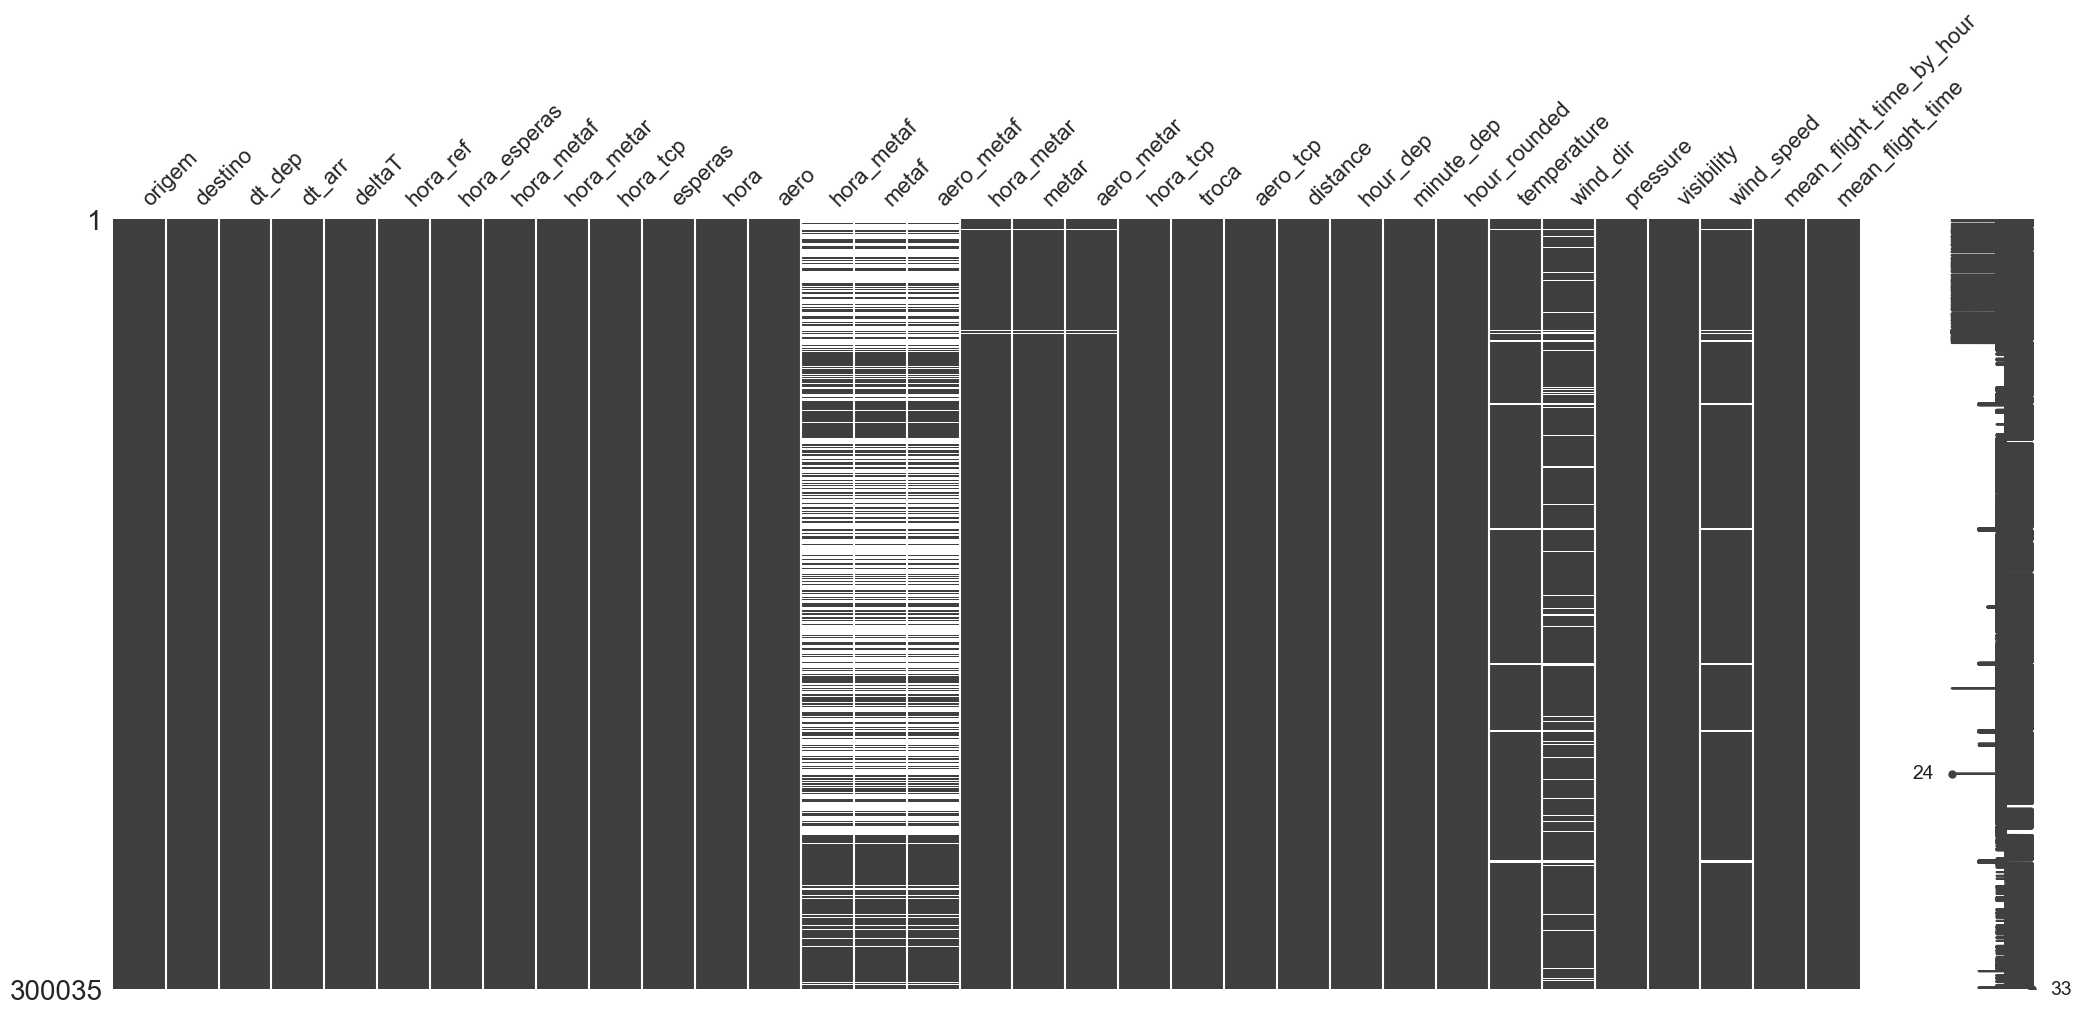

In [105]:
from metar import Metar
import numpy as np

def wind_speed(metar):
    try:
        return Metar.Metar(metar).wind_speed._value 
    except:
        return np.nan
    
def vis_distance(metar):
    try:
        return Metar.Metar(metar).vis._value
    except:
        return np.nan
    
def temperature(metar):
    try:
        return Metar.Metar(metar).temp._value
    except:
        return np.nan
    
def dew_point(metar):
    try:
        return Metar.Metar(metar).dewpt._value
    except:
        return np.nan
    
def wind_dir(metar):
    try:
        return Metar.Metar(metar).wind_dir._degrees
    except:
        return np.nan

def pressure(metar):
    try:
        return Metar.Metar(metar).press._value
    except:
        return np.nan
    
def clouds(metar):
    try:
        return Metar.Metar(metar).sky
    except:
        return np.nan

def calcular_angulo(row, aeroportos):
    aeroporto_origem = row['origem']
    aeroporto_chegada = row['destino']

    lat_lon_origem = aeroportos[aeroporto_origem]
    lat_lon_chegada = aeroportos[aeroporto_chegada]

    lat1, lon1 = lat_lon_origem
    lat2, lon2 = lat_lon_chegada

    angulo_radianos = math.atan2(lat2 - lat1, lon2 - lon1)
    angulo_graus = math.degrees(angulo_radianos) % 360

    return angulo_graus
data_raw['temperature'] = data_raw.apply(lambda row: temperature(row['metar']), axis=1)
print('temperature')

data_raw['wind_dir'] = data_raw.apply(lambda row: wind_dir(row['metar']), axis=1)
print('wind_dir')

data_raw['pressure'] = data_raw.apply(lambda row: pressure(row['metar']), axis=1)


data_raw['visibility'] = data_raw.apply(lambda row: vis_distance(row['metar']), axis=1)
data_raw['wind_speed'] = data_raw.apply(lambda row: wind_speed(row['metar']), axis=1)
print('wind_speed')


def categorizar(valor):
    if valor > 5000:
        return 1
    else:
        return 0
    
data_raw['visibility'] = data_raw['visibility'].map(categorizar)

def replace_value(value):
    if value is np.nan:
        return 0
    else:
        return 1

def len_clouds(value):
    return value.count(")")

data_raw['pressure'] = data_raw['pressure'].fillna(1000.0)

data_raw = data_raw.merge(mean_time_by_hour, on=['origem', 'destino','hour_rounded'], how='left')
data_raw = data_raw.merge(mean_time_df, on=['origem', 'destino'], how='left')

msno.matrix(data_raw)
plt.show()
# Aplicar a função calcular_angulo a cada linha do DataFrame
data_raw['Angulo'] = data_raw.apply(calcular_angulo, args=(AEROPORTOS,), axis=1)

data_raw['relative_dir'] =  180 - abs( 180 - abs(data_raw['Angulo']- data_raw['wind_dir']))

data_raw['v'] = data_raw['wind_speed'] * np.cos(data_raw['relative_dir']*np.pi/180)
data_raw['u'] = data_raw['wind_speed'] * np.sin(data_raw['relative_dir']*np.pi/180)

In [106]:


##### Possible columns:
# 'origem', 'destino', 'dt_dep', 'esperas', 'metaf', 'metar', 'troca',
# 'distance', 'distanceCAT', 'temperature', 'dew_point', 'wind_dir',
# 'pressure', 'clouds', 'visibility', 'wind_speed', 'weather', 'mean_flight_time','deltaT','v','u'
print(data_raw.columns)
cols = ['deltaT', 'esperas', 'troca', 'distance','v','u','temperature','mean_flight_time', 'mean_flight_time_by_hour']

data_raw = data_raw[cols]

data_raw['esperas'] = data_raw['esperas'].fillna(0)
data_raw = data_raw.fillna(method='ffill')

print(data_raw.info())
X =  data_raw.drop(['deltaT'], axis=1)
y =  data_raw['deltaT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train

Index(['origem', 'destino', 'dt_dep', 'dt_arr', 'deltaT', 'hora_ref',
       'hora_esperas', 'hora_metaf', 'hora_metar', 'hora_tcp', 'esperas',
       'hora', 'aero', 'hora_metaf', 'metaf', 'aero_metaf', 'hora_metar',
       'metar', 'aero_metar', 'hora_tcp', 'troca', 'aero_tcp', 'distance',
       'hour_dep', 'minute_dep', 'hour_rounded', 'temperature', 'wind_dir',
       'pressure', 'visibility', 'wind_speed', 'mean_flight_time_by_hour',
       'mean_flight_time', 'Angulo', 'relative_dir', 'v', 'u'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300035 entries, 0 to 300034
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   deltaT                    300035 non-null  float64
 1   esperas                   300035 non-null  float64
 2   troca                     300035 non-null  float64
 3   distance                  300035 non-null  float64
 4   v                  

,esperas,troca,distance,v,u,temperature,mean_flight_time,mean_flight_time_by_hour
67828,0.0,0.0,495.202334,-4.991338,0.294190,22.0,3293.678022,3273.173077
225404,0.0,1.0,1120.030343,-5.727447,10.544968,29.0,5587.628200,5711.981203
3275,0.0,0.0,2100.572404,-1.716576,13.894365,29.0,9718.456070,9777.575701
78432,0.0,0.0,359.678450,-2.224539,2.012816,14.0,2640.613006,2689.748397
282691,0.0,0.0,837.607091,-3.614941,1.712368,18.0,4770.149927,4798.108742
...,...,...,...,...,...,...,...,...
119879,0.0,0.0,872.709147,5.695176,6.968858,28.0,5031.253341,5129.717718
259178,1.0,0.0,398.439389,5.458198,10.686818,19.0,3272.565919,3290.601108
131932,0.0,0.0,1223.191882,1.211817,11.938656,26.0,6793.207527,6730.142857
146867,0.0,1.0,837.607091,-4.996475,0.187722,25.0,4679.797520,4785.065056


In [107]:
X_train[X_train['distance']==0]

,esperas,troca,distance,v,u,temperature,mean_flight_time,mean_flight_time_by_hour
149910,0.0,0.0,0.0,-3.464102e+00,2.000000,23.0,0.0,0.0
141433,0.0,0.0,0.0,-4.499513e+00,5.362311,24.0,0.0,0.0
108904,0.0,1.0,0.0,-3.758770e+00,1.368081,19.0,0.0,0.0
166198,2.0,0.0,0.0,5.510911e-16,9.000000,24.0,0.0,0.0
246118,0.0,0.0,0.0,-1.125833e+01,6.500000,28.0,0.0,0.0
...,...,...,...,...,...,...,...,...
141439,0.0,0.0,0.0,-4.499513e+00,5.362311,24.0,0.0,0.0
13731,0.0,0.0,0.0,2.394141e+00,6.577848,18.0,0.0,0.0
31728,0.0,1.0,0.0,9.000000e+00,0.000000,18.0,0.0,0.0
236187,0.0,0.0,0.0,2.024848e+00,6.700745,28.0,0.0,0.0


In [108]:
# from sklearn.ensemble import GradientBoostingRegressor

# Crie um regressor Random Forest
# rf_regressor = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=120,max_depth=15, max_features =0.75, min_samples_leaf=3, random_state=42)

# rf_regressor = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50,
#     max_depth=12, random_state=42, alpha=0.9
# )

# Treine o modelo no conjunto de treinamento
rf_regressor.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = rf_regressor.predict(X_test)
y_pred_train = rf_regressor.predict(X_train)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)

# Imprima as métricas de desempenho
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Erro Quadrático Médio Train Set (MSE): {mse_train}")
print(f"RMSE: {rmse}")

Erro Quadrático Médio (MSE): 140714.66038050066
Erro Quadrático Médio Train Set (MSE): 108583.90963277219
RMSE: 375.11952812470406


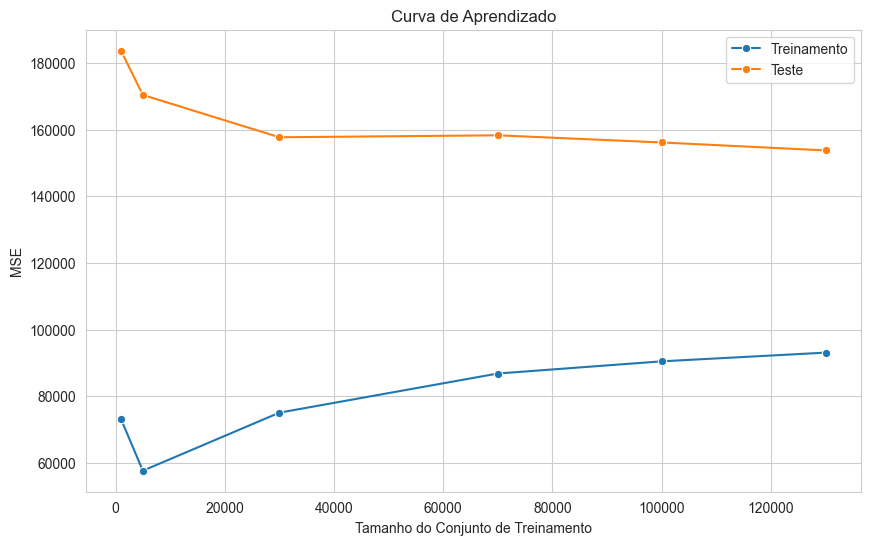

In [31]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Plote a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(rf_regressor, X, y, cv=KFold(n_splits=2), scoring='neg_mean_squared_error', train_sizes=[1000,5000, 30000, 70000,100000, 130000])
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("MSE")

sns.lineplot(x=train_sizes, y=train_scores_mean, ls='-', marker='o', label="Treinamento")
sns.lineplot(x=train_sizes, y=test_scores_mean, ls='-', marker='o', label="Teste")
plt.legend(loc="best")
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error

# Create a random forest model
rf = RandomForestRegressor(random_state=42)

# # Define the hyperparameter grid to search
param_grid = {
    'max_depth': [20], # Default = None
    'min_samples_leaf': [3], # Default = 1
    # 'min_samples_split': [2, 3, 4], # Default = 2
    'n_estimators': [120], # Default = 100
    # 'bootstrap':[True, False], # Default = True
    'max_features': [0.75] # Default = 1.0
}


# Instantiate the grid search model
grid_search = GridSearchCV(
                                estimator = rf, 
                                param_grid = param_grid, 
                                n_jobs = -1, 
                                verbose = 2, 
                                return_train_score=True, 
                                cv = KFold(n_splits=3),
                                scoring=make_scorer(score_func=mean_squared_error, greater_is_better=False)
                            )

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding RMSE score
print("Best Hyperparameters: ", grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Hyperparameters:  {'max_depth': 20, 'max_features': 0.75, 'min_samples_leaf': 3, 'n_estimators': 120}


In [79]:
print("Best Score: ", grid_search.best_score_)

Best Score:  -134673.79763692385


<Axes: xlabel='mean_flight_time', ylabel='deltaT'>

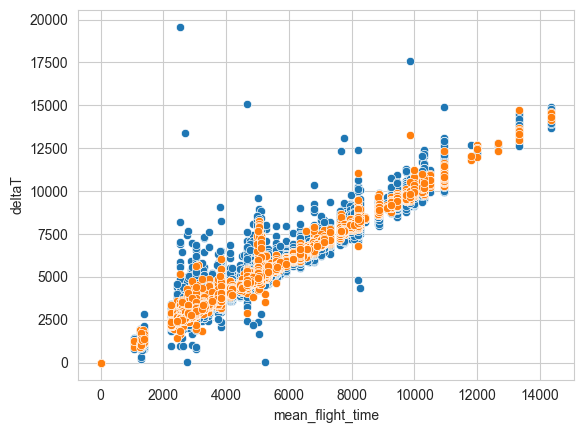

In [109]:
sns.scatterplot(y=y_test, x=X_test['mean_flight_time'])
sns.scatterplot(y=y_pred, x=X_test['mean_flight_time'])

In [9]:
# Calcule os erros
erros = (y_test - y_pred)/(3600)

# Crie um DataFrame com as previsões, os valores reais e os erros
df_resultados = pd.DataFrame({'Previsões': y_pred, 'Valores Reais': y_test, 'Erros': erros})

df_resultados['erro_minutos']=df_resultados['Erros']*60
# Imprima o DataFrame
df_resultados

,Previsões,Valores Reais,Erros,erro_minutos
105934,10294.810207,10290.0,-0.001336,-0.080170
42794,3136.830106,3155.0,0.005047,0.302832
39852,4790.836526,5060.0,0.074768,4.486058
97137,5456.905908,5584.0,0.035304,2.118235
240961,2467.744697,2352.0,-0.032151,-1.929078
...,...,...,...,...
49351,2413.278332,2553.0,0.038812,2.328694
231240,9996.778392,9949.0,-0.013272,-0.796307
155300,6087.335473,6607.0,0.144351,8.661075
34011,2485.245946,2471.0,-0.003957,-0.237432


In [10]:
threshold = 30

mask = (df_resultados['erro_minutos']>=threshold) | (df_resultados['erro_minutos']<=-threshold)
erros_index = df_resultados[mask].index
df_resultados[mask].sort_values(by='erro_minutos')

,Previsões,Valores Reais,Erros,erro_minutos
156400,8617.212303,2331.0,-1.746170,-104.770205
12294,7333.421335,4864.0,-0.685950,-41.157022
259271,12339.398889,9892.0,-0.679833,-40.789981
104042,12270.187504,9894.0,-0.660052,-39.603125
120607,9980.319081,7763.0,-0.615922,-36.955318
...,...,...,...,...
73085,3925.741674,11373.0,2.068683,124.120972
274614,5484.134528,13260.0,2.159963,129.597758
122333,4625.205251,13441.0,2.448832,146.929912
122334,2559.802090,11688.0,2.535611,152.136632


In [101]:
check = X_test.loc[erros_index]
check

,distance,mean_flight_time,hour_rounded,temperature,dew_point,pressure,clouds,visibility,v,weather,u
122333,675.423676,3845.555880,10,18.0,16.0,1021.0,3,1,4.156642,0,5.632257
147655,1479.504420,8195.000699,16,27.0,18.0,1015.0,2,1,0.337900,0,8.993655
177636,675.423676,3845.555880,15,21.0,19.0,1018.0,3,0,2.173511,0,2.067813
145023,1479.504420,8195.000699,7,19.0,17.0,1006.0,1,1,-2.971899,1,0.409655
214423,837.607091,4680.639766,16,24.0,19.0,1018.0,3,1,2.782696,0,10.642209
...,...,...,...,...,...,...,...,...,...,...,...
11522,515.566803,3746.491044,10,8.0,8.0,1022.0,1,0,1.988443,0,0.214697
276365,488.073154,3237.764128,22,21.0,20.0,1006.0,3,1,-2.103407,0,4.536042
222061,336.456265,2761.744132,16,28.0,20.0,1021.0,2,1,1.890708,1,0.652092
42909,866.126835,5044.644589,19,23.0,18.0,1018.0,0,1,4.064386,1,2.912175


<Axes: title={'center': 'Feature Importance de um Random Forest'}, xlabel='Importância das Características'>

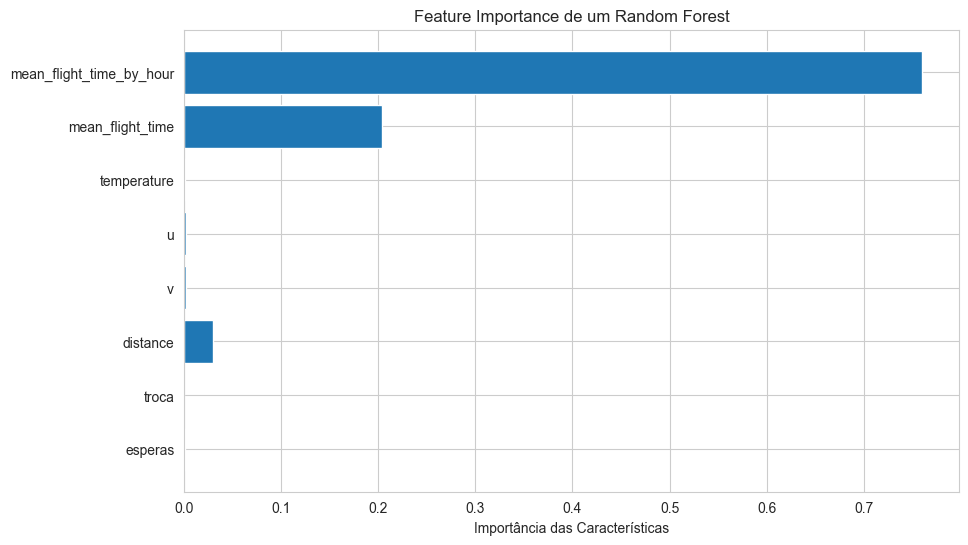

In [110]:
# Obtenha as importâncias das características do rf_regressoro
feature_importances = rf_regressor.feature_importances_
feature_names = X_train.columns

# Crie um gráfico de barras bonito para mostrar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Importância das Características')
plt.title('Feature Importance de um Random Forest')
plt.gca()

# Calculate for submission data

In [111]:
data_test = pd.read_csv('data/idsc_dataset.csv', sep=';')

data_test['metar'].fillna(method='ffill', inplace=True)
data_test['metar'] = data_test['metar'].apply(lambda x: x[:11]+'30'+x[13:] if x[11:13]=='31' else x)

data_test['distance'] = data_test.apply(calcular_distancia, axis=1)

C:\Users\Lucas Ramos\AppData\Local\Temp\ipykernel_21492\2218253522.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_test['dt_dep'] = pd.to_datetime(data_test['dt_dep'])


temperature
wind_dir
wind_speed


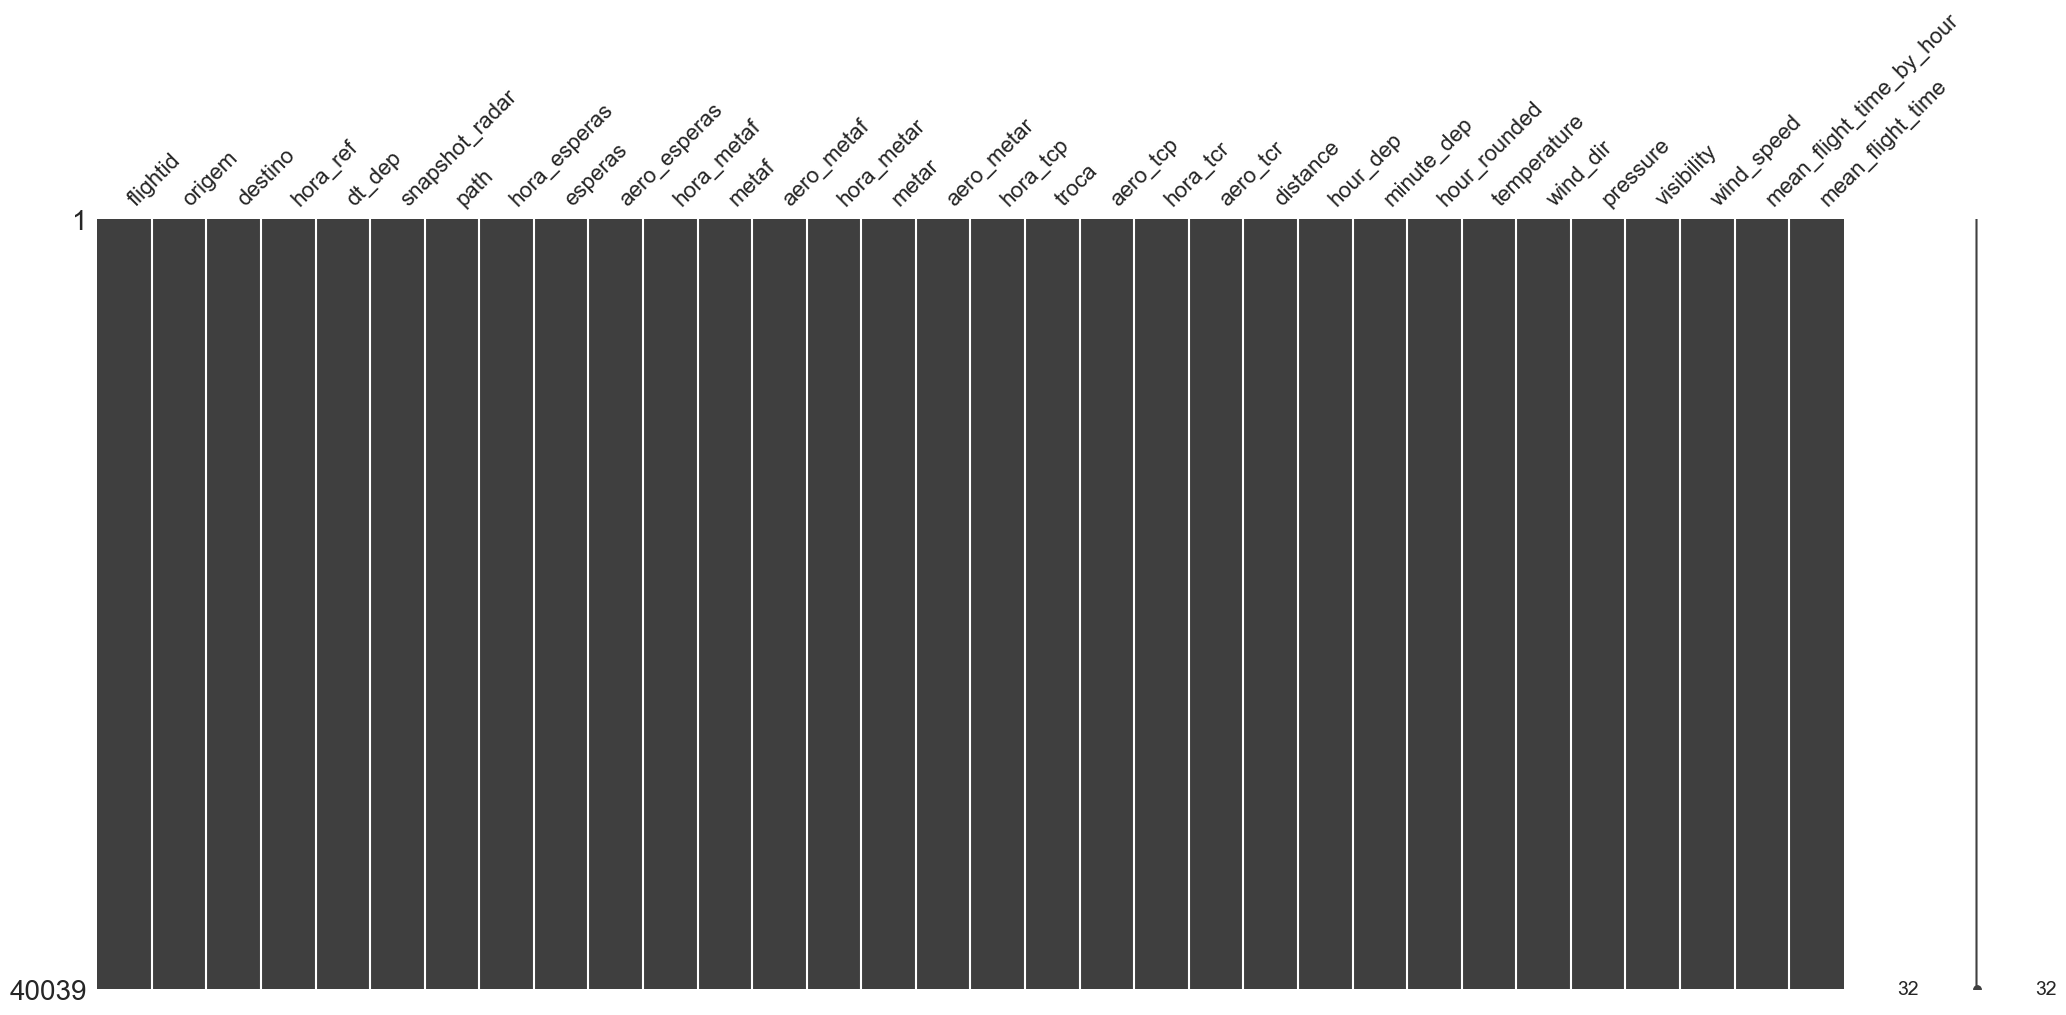

In [112]:
data_test['dt_dep'] = pd.to_datetime(data_test['dt_dep'])
data_test['hour_dep'] = data_test['dt_dep'].dt.hour
data_test['minute_dep'] = data_test['dt_dep'].dt.minute
data_test['hour_rounded'] = round((data_test['hour_dep']*60 + data_test['minute_dep'])/60, 0)
data_test['hour_rounded'] = data_test['hour_rounded'].astype('int')
def wind_speed(metar):
    try:
        return Metar.Metar(metar).wind_speed._value 
    except:
        return np.nan
    
def vis_distance(metar):
    try:
        return Metar.Metar(metar).vis._value
    except:
        return np.nan
    
def temperature(metar):
    try:
        return Metar.Metar(metar).temp._value
    except:
        return np.nan
    
def dew_point(metar):
    try:
        return Metar.Metar(metar).dewpt._value
    except:
        return np.nan
    
def wind_dir(metar):
    try:
        return Metar.Metar(metar).wind_dir._degrees
    except:
        return np.nan

def pressure(metar):
    try:
        return Metar.Metar(metar).press._value
    except:
        return np.nan
    
def clouds(metar):
    try:
        return Metar.Metar(metar).sky
    except:
        return np.nan

def calcular_angulo(row, aeroportos):
    aeroporto_origem = row['origem']
    aeroporto_chegada = row['destino']

    lat_lon_origem = aeroportos[aeroporto_origem]
    lat_lon_chegada = aeroportos[aeroporto_chegada]

    lat1, lon1 = lat_lon_origem
    lat2, lon2 = lat_lon_chegada

    angulo_radianos = math.atan2(lat2 - lat1, lon2 - lon1)
    angulo_graus = math.degrees(angulo_radianos) % 360

    return angulo_graus
data_test['temperature'] = data_test.apply(lambda row: temperature(row['metar']), axis=1)
print('temperature')

data_test['wind_dir'] = data_test.apply(lambda row: wind_dir(row['metar']), axis=1)
print('wind_dir')

data_test['pressure'] = data_test.apply(lambda row: pressure(row['metar']), axis=1)


data_test['visibility'] = data_test.apply(lambda row: vis_distance(row['metar']), axis=1)
data_test['wind_speed'] = data_test.apply(lambda row: wind_speed(row['metar']), axis=1)
print('wind_speed')


def categorizar(valor):
    if valor > 5000:
        return 1
    else:
        return 0
    
data_test['visibility'] = data_test['visibility'].map(categorizar)

def replace_value(value):
    if value is np.nan:
        return 0
    else:
        return 1

def len_clouds(value):
    return value.count(")")

data_test['pressure'] = data_test['pressure'].fillna(1000.0)

data_test = data_test.merge(mean_time_by_hour, on=['origem', 'destino','hour_rounded'], how='left')
data_test = data_test.merge(mean_time_df, on=['origem', 'destino'], how='left')

data_test['mean_flight_time_by_hour']=data_test['mean_flight_time_by_hour'].fillna(data_test['mean_flight_time'])
data_test=data_test.fillna(0)
msno.matrix(data_test)
plt.show()
# Aplicar a função calcular_angulo a cada linha do DataFrame
data_test['Angulo'] = data_test.apply(calcular_angulo, args=(AEROPORTOS,), axis=1)

data_test['relative_dir'] =  180 - abs( 180 - abs(data_test['Angulo']- data_test['wind_dir']))

data_test['v'] = data_test['wind_speed'] * np.cos(data_test['relative_dir']*np.pi/180)
data_test['u'] = data_test['wind_speed'] * np.sin(data_test['relative_dir']*np.pi/180)

In [113]:
data_test[data_test['mean_flight_time_by_hour'].isna()]

,flightid,origem,destino,hora_ref,dt_dep,snapshot_radar,path,hora_esperas,esperas,aero_esperas,...,wind_dir,pressure,visibility,wind_speed,mean_flight_time_by_hour,mean_flight_time,Angulo,relative_dir,v,u


In [114]:
# cols = ['distanceCAT', 'hour_rounded']
cols.remove('deltaT')
X_submission =  data_test[cols]
display(X_submission)

y_pred = rf_regressor.predict(X_submission)

y_pred

,esperas,troca,distance,v,u,temperature,mean_flight_time,mean_flight_time_by_hour
0,1,0.0,872.709147,3.421074,6.107066,18.0,5031.253341,5059.750000
1,0,0.0,331.045035,0.250329,4.993730,11.0,2432.954901,2460.615385
2,0,0.0,866.126835,-3.852237,1.077158,21.0,5044.684533,4931.389041
3,0,0.0,1804.723136,8.844491,1.665825,25.0,8424.911765,8249.333333
4,0,0.0,342.948013,-2.514777,3.110610,23.0,2760.717105,2829.436893
...,...,...,...,...,...,...,...,...
40034,0,0.0,649.950700,-10.695941,10.516504,27.0,3812.702273,3852.012821
40035,0,0.0,331.045035,1.594531,1.207258,19.0,2791.178259,2568.823276
40036,0,0.0,495.202334,-0.693874,2.918654,13.0,3032.217499,2979.150602
40037,0,0.0,854.437636,-1.311374,3.778928,25.0,4672.914032,4608.083333


array([5071.68692545, 2515.98564403, 4908.80731383, ..., 2938.94173011,
       4597.38304548, 5041.94693682])

In [115]:
data_submission = data_test[['flightid']].copy()
data_submission['solution'] = y_pred

data_submission = data_submission.rename(columns={'flightid':'ID'})

#data_submission['solution'] = data_submission['solution'].astype('int')
data_submission

,ID,solution
0,4f0356600f61e3fcbea8ed8a137a2423,5071.686925
1,865dbbbe74bebea18a71f24342516ff0,2515.985644
2,1803af9cfc6a2c74d188481e3ffd848e,4908.807314
3,f6af733a687f904183efd149ec713be5,8263.646797
4,6117f9ac60b7f66b740c9130be433313,2798.680647
...,...,...
40034,4e08052066073297c7a3c55798618324,3879.588031
40035,e22f120c65f5759aa8df576b59d71be3,2539.474484
40036,ca9399162037201a4d0c49c832a32739,2938.941730
40037,560136088f5f1493dbad809a3554172c,4597.383045


In [116]:
data_submission.to_csv('submission/mean_flight_by_hour_mean_time_120_15_075_3.csv',index=False)